In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


Bad key "xtick.alignment" on line 250 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.alignment" on line 268 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

### Newton's method
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
Example 1: find root for 
$$f(x) = x^2 - sin(x)$$
$$f'(x) = 2x - cos(x)$$

In [3]:
sess = tf.Session(config=config)

In [4]:
X = np.linspace(-2, 2, 100)

In [5]:
x = tf.placeholder(tf.float32, name="x")
y = x**2 - tf.sin(x)

#### Calculating derevative

In [6]:
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [7]:
grad_by_hand = 2*x - tf.cos(x)

[array([-3.5838532 , -3.540114  , -3.4969935 , -3.4544303 , -3.412362  ,
        -3.3707254 , -3.329456  , -3.28849   , -3.2477622 , -3.207207  ,
        -3.1667585 , -3.1263514 , -3.0859191 , -3.045396  , -3.0047166 ,
        -2.9638152 , -2.9226265 , -2.8810859 , -2.8391294 , -2.7966938 ,
        -2.753716  , -2.7101343 , -2.6658883 , -2.620918  , -2.575165  ,
        -2.5285723 , -2.4810839 , -2.432645  , -2.3832035 , -2.3327076 ,
        -2.2811081 , -2.2283573 , -2.1744094 , -2.1192207 , -2.062749  ,
        -2.0049548 , -1.9458007 , -1.885251  , -1.823273  , -1.7598357 ,
        -1.6949108 , -1.6284724 , -1.5604973 , -1.4909639 , -1.4198545 ,
        -1.347153  , -1.272846  , -1.196923  , -1.1193762 , -1.0402    ,
        -0.9593919 , -0.8769519 , -0.79288256, -0.7071894 , -0.6198802 ,
        -0.5309657 , -0.44045895, -0.34837598, -0.2547351 , -0.15955728,
        -0.06286597,  0.03531289,  0.13495094,  0.23601758,  0.33847952,
         0.4423015 ,  0.54744613,  0.6538734 ,  0.7

#### Plot

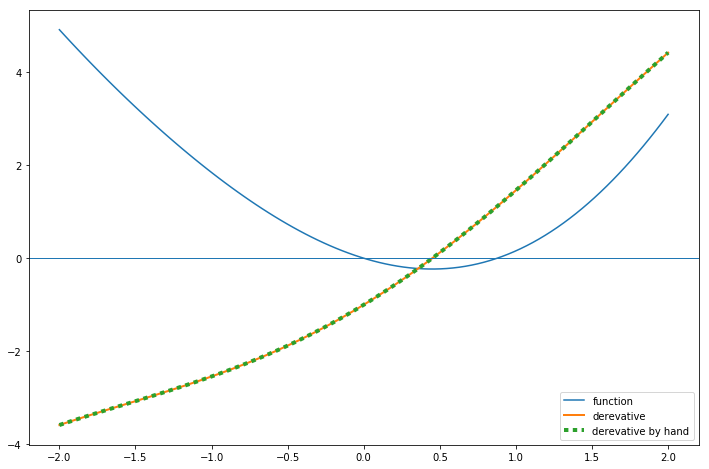

In [15]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [23]:
iterations = 10
xs1 = [-2]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)
    
xs2 = [2]

for _ in range(iterations):
    current_x = xs2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs2.append(next_x)


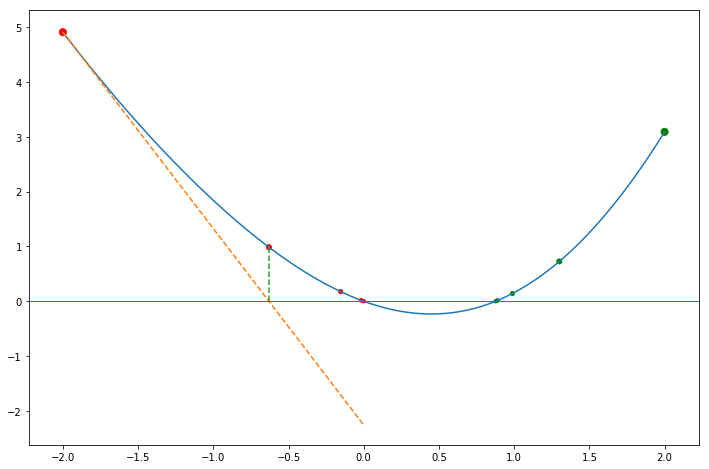

In [24]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs1, sess.run(y, {x: xs1}), s = 50/np.arange(1, 1+len(xs1)), c="red")

x0, y0, k = xs1[0], sess.run(y, {x: xs1[0]}), sess.run(grad_y[0], {x: xs1[0]})
plt.plot([x0, 0], [y0, y0 + k * (0 - x0)], "--")
plt.plot([xs1[1], xs1[1]], [0, sess.run(y, {x: xs1[1]})], "--")

plt.scatter(xs2, sess.run(y, {x: xs2}), s = 50/np.arange(1, 1+len(xs2)), c="green")

plt.axhline(y=0, linewidth=1)

In [11]:
print("root 1:", xs1[-1],"\nroot 2:", xs2[-1])

root 1: 0.0 
root 2: 0.87672619035407
